In [95]:
#Import your libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [96]:
file_url = r'C:\Users\Michel\git2\Ironhack-DAFT-Project7-ML-Netflix\imdb_processed_clean_encoded.csv'


In [97]:
df = pd.read_csv(file_url)

In [98]:
df.head()

,year,kind,rating,vote,runtime,genre1,genre2,country1,country2,language1,language2,cast1,cast2,director1,director2,composer1,composer2,writer1,writer2
0,2003,2,7.7,474.0,50.000000,6,2,62,71,16,110,817,4941,3923,611,2512,762,3299,2469
1,1994,7,8.1,18.0,83.000000,8,27,62,71,16,110,3598,381,3659,611,2512,762,4765,3786
2,1992,1,5.5,93.0,96.828211,0,20,37,71,33,110,2472,1621,4067,611,354,762,2582,1672
3,2004,1,5.3,13432.0,60.000000,6,4,62,71,16,37,3014,1499,4012,39,410,762,4877,288
4,1991,1,4.5,2177.0,96.000000,4,13,62,71,16,110,589,3310,1100,611,265,762,2868,405


In [99]:
df[df['rating']>9.5]

,year,kind,rating,vote,runtime,genre1,genre2,country1,country2,language1,language2,cast1,cast2,director1,director2,composer1,composer2,writer1,writer2


In [101]:
df.dtypes

year           int64
kind           int64
rating       float64
vote         float64
runtime      float64
genre1         int64
genre2         int64
country1       int64
country2       int64
language1      int64
language2      int64
cast1          int64
cast2          int64
director1      int64
director2      int64
composer1      int64
composer2      int64
writer1        int64
writer2        int64
dtype: object

In [102]:
target='rating'

In [103]:
x=df.drop(columns=target)
#x=df_enc.drop(index=[712],columns='survived')
#x_check=titanic_enc.tail(1).drop(columns='survived')
y=round(df[target]).astype(int)

In [104]:
y

0       8
1       8
2       6
3       5
4       4
       ..
8063    4
8064    6
8065    5
8066    6
8067    8
Name: rating, Length: 8068, dtype: int32

In [105]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [106]:
y.head()

0    8
1    8
2    6
3    5
4    4
Name: rating, dtype: int32

In [31]:
#METHOD 1:
rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 5 , step = 1, verbose=1)
m=rfe_selector.fit(x, y)

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [32]:
x.columns[m.get_support()]
print("Num Features: %s" % (m.n_features_))
print("Selected Features: %s" % (m.support_))
print("Feature Ranking: %s" % (m.ranking_))

Num Features: 5
Selected Features: [False False  True False False False False False False False  True  True
  True False False False  True False]
Feature Ranking: [ 3  9  1  2  6  7  8 11 10 12  1  1  1 14  4 13  1  5]


In [33]:
x.loc[:, m.support_].columns

Index(['vote', 'cast1', 'cast2', 'director1', 'writer1'], dtype='object')

In [36]:
#METHOD 2:
from sklearn.feature_selection import SelectFromModel
SFM = SelectFromModel(estimator=RandomForestClassifier())
s=SFM.fit(x, y)

In [38]:
n_features = s.transform(x).shape[1]
n_features

10

In [40]:
feature_idx = s.get_support()
feature_name = x.columns[feature_idx]
feature_name 

Index(['year', 'vote', 'runtime', 'genre1', 'cast1', 'cast2', 'director1',
       'composer1', 'writer1', 'writer2'],
      dtype='object')

In [107]:
#METHOD 3:
from sklearn.feature_selection import RFECV

In [108]:
y.value_counts()

7    2530
8    2081
6    1910
5     703
4     395
9     272
3     132
2      45
Name: rating, dtype: int64

In [109]:
rfecv = RFECV(
    estimator=RandomForestClassifier(),
    min_features_to_select=2,
    step=5,
    n_jobs=-1, #multiprocessing: -1: use all available processor
    scoring="r2",
    cv=5,
    verbose=1
)

In [110]:
y.describe()

count    8068.000000
mean        6.674145
std         1.309174
min         2.000000
25%         6.000000
50%         7.000000
75%         8.000000
max         9.000000
Name: rating, dtype: float64

In [111]:
m= rfecv.fit(x, y)

In [113]:
len(x.columns[rfecv.support_])

18

In [112]:
x.columns[rfecv.support_]

Index(['year', 'kind', 'vote', 'runtime', 'genre1', 'genre2', 'country1',
       'country2', 'language1', 'language2', 'cast1', 'cast2', 'director1',
       'director2', 'composer1', 'composer2', 'writer1', 'writer2'],
      dtype='object')

In [ ]:
#TRAIN_TEST_SPLIT:
from sklearn.model_selection import train_test_split

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [115]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 

In [125]:
y

0       8
1       8
2       6
3       5
4       4
       ..
8063    4
8064    6
8065    5
8066    6
8067    8
Name: rating, Length: 8068, dtype: int32

(array([  45.,  132.,  395.,    0.,  703., 1910.,    0., 2530., 2081.,
         272.]),
 array([2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3, 9. ]),
 <BarContainer object of 10 artists>)

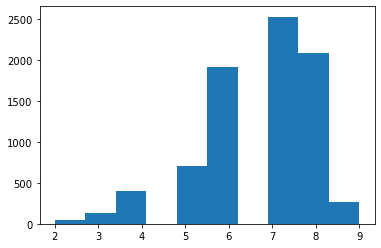

In [126]:
plt.hist(y)

In [ ]:
#HYPERPARAMETER TUNING
#METHOD 1 GRID SEARCH :

In [128]:
from sklearn.svm import NuSVC

In [132]:
np.arange(0.2,1,0.1)

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [131]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
grid_search = GridSearchCV(NuSVC(), #take a model like RFC responsible for searching
                           {
                              'nu':np.arange(0.2,1,0.1)
                            
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1 #my goal is Accuracy , we want verbosity for more details
                           ) #cv = crossvalidation, how many folds you want
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\Michel\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


ValueError: specified nu is infeasible

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
grid_search = GridSearchCV(AdaBoostClassifier(random_state=0), #take a model like RFC responsible for searching
                           {
                              'n_estimators':np.arange(5,400,5)
                            
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1 #my goal is Accuracy , we want verbosity for more details
                           ) #cv = crossvalidation, how many folds you want
grid_search.fit(X_train,y_train)

grid_search.best_params_
grid_search.best_score_

METHOD 1 RANDOM SEARCH:
rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=0),
                           {
                              'n_estimators':np.arange(5,400,5)
                            
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(X_train,y_train)


rand_search.best_params_
rand_search.best_score_


CHOICE OF MODEL : 



From sklearn.ensemble import AdaBoostClassifier

clf= AdaBoostClassifier(n_estimators=100, random_state=0)

	n_estimator found thanks to hyperparameter tuning

clf.fit(X,y)

clf.predict(x_train)

clf.score(X,y)
